<a href="https://colab.research.google.com/github/srujanreddy2021/AI_ML_IITH_Projects_Labs/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=2fd7cb28845d75b8c7c1f14598e4a841f1a1fd55a34dbe783d836d1b087193c6
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [3]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
topic3 = 'Panda'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
eng3 = wikipedia.page(topic3).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content
fr3 = wikipedia.page(topic3).content

#german
wikipedia.set_lang('de')

de2 = wikipedia.page(topic2).content
de3 = wikipedia.page(topic3).content

This is what the text looks like:

In [4]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

In [5]:
eng1

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes were thought to be one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, as well as morphological measurements. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is leaves, fruits, and flowers of woody p

In [6]:
de2

'Die Elefanten (Elephantidae) sind eine Familie aus der Ordnung der Rüsseltiere. Die Familie stellt die größten gegenwärtig lebenden Landtiere und schließt außerdem die einzigen heute noch lebenden Vertreter der Ordnungsgruppe ein. Es werden drei rezente Arten unterschieden: der Afrikanische Elefant, der die weitgehend offenen Landschaften Afrikas südlich der Sahara bewohnt, der ebenfalls in Afrika heimische, aber weitgehend auf tropische Regenwälder beschränkte Waldelefant und der im südlichen und südöstlichen Asien vorkommende Asiatische Elefant, der eine Vielzahl von Landschaftsräumen nutzt. Alle Elefanten sind durch ihren Rüssel, ein muskulöses Organ, das aus der Verwachsung der Nase mit der Oberlippe hervorgegangen ist, und durch ihre aus den oberen Schneidezähnen gebildeten Stoßzähne gekennzeichnet. Weitere auffällige Merkmale finden sich in dem massiven Körperbau mit säulenförmigen Beinen und der grauen, wenig behaarten Haut.\nElefanten sind soziale Tiere, die in Familiengruppen

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [7]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text


In [8]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)
de2 = cleanup(de2)
de3 = cleanup(de3)

In [9]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [10]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

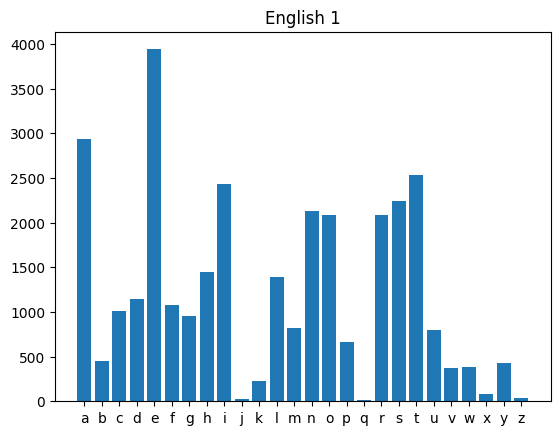

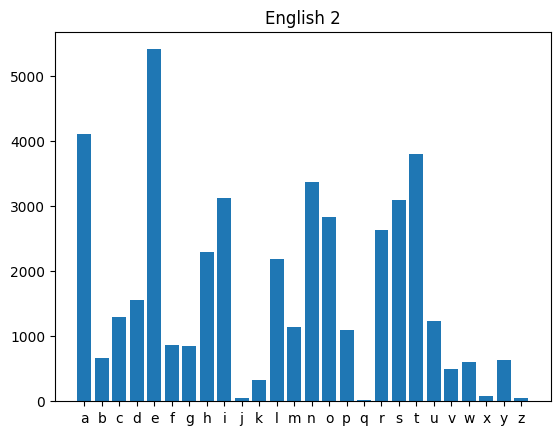

In [11]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

In [27]:
unigram_eng1

Counter({('t',): 2529,
         ('h',): 1445,
         ('e',): 3940,
         ('g',): 950,
         ('i',): 2430,
         ('r',): 2083,
         ('a',): 2939,
         ('f',): 1078,
         ('s',): 2247,
         ('l',): 1388,
         ('c',): 1009,
         ('n',): 2128,
         ('o',): 2083,
         ('d',): 1145,
         ('m',): 823,
         ('b',): 446,
         ('u',): 803,
         ('v',): 373,
         ('y',): 424,
         ('w',): 386,
         ('p',): 667,
         ('x',): 81,
         ('k',): 231,
         ('z',): 32,
         ('j',): 22,
         ('q',): 14})

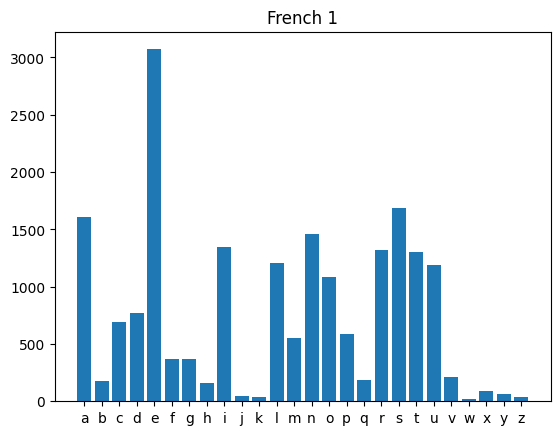

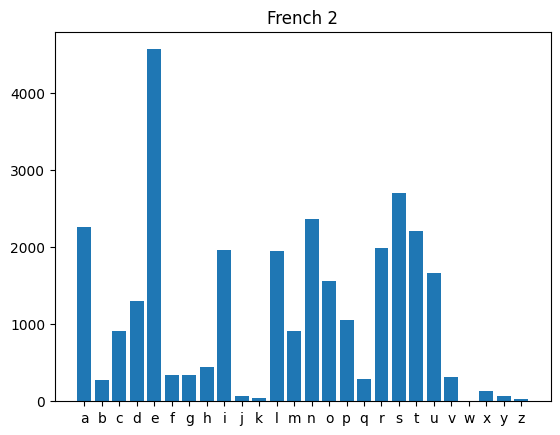

In [12]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

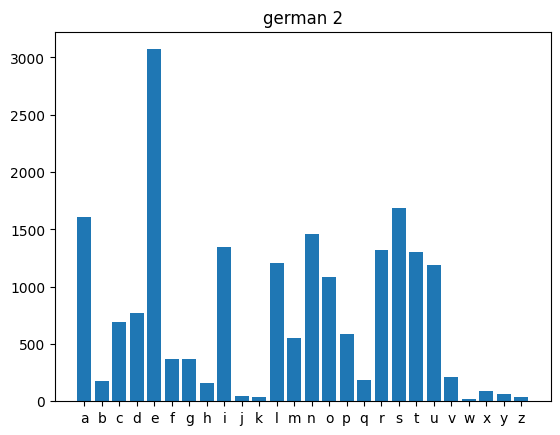

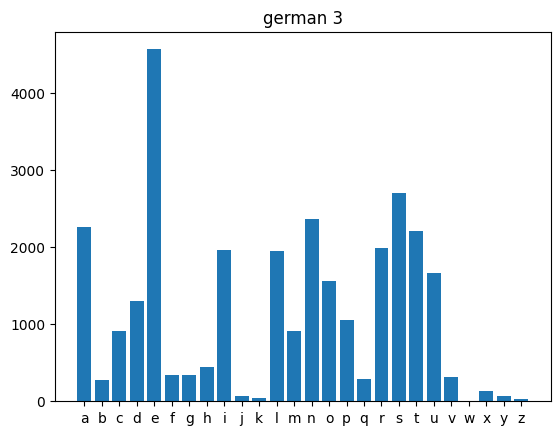

In [13]:
unigram_de2 = Counter(ngrams(fr1,1))
plothistogram(unigram_de2)
plt.title('german 2')
plt.show()
unigram_de3 = Counter(ngrams(fr2,1))
plothistogram(unigram_de3)
plt.title('german 3')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

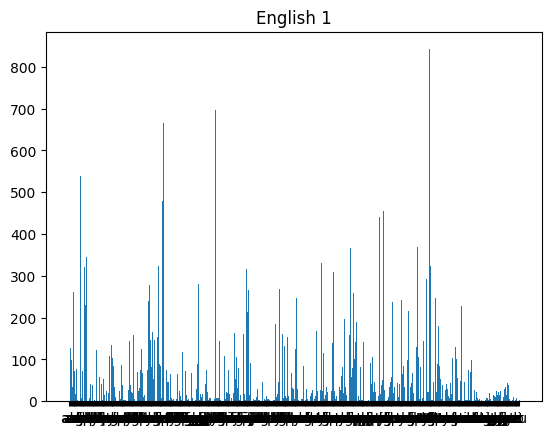

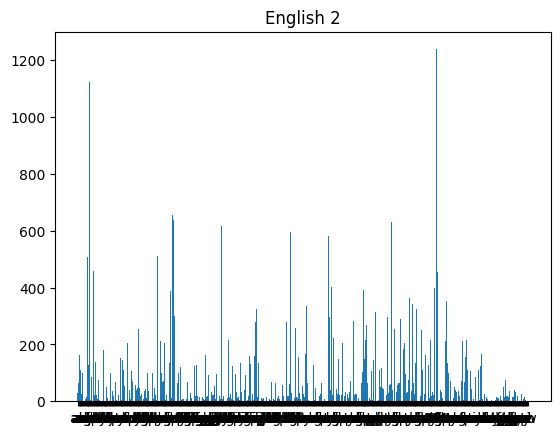

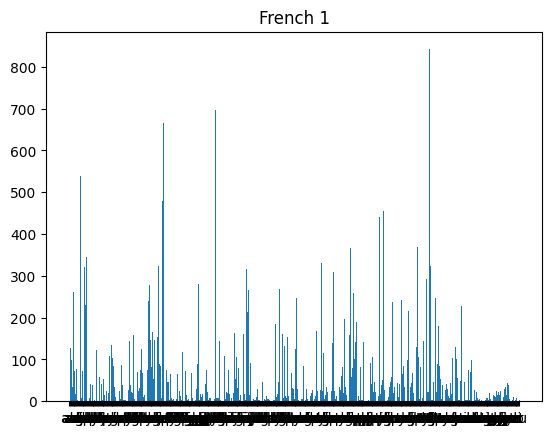

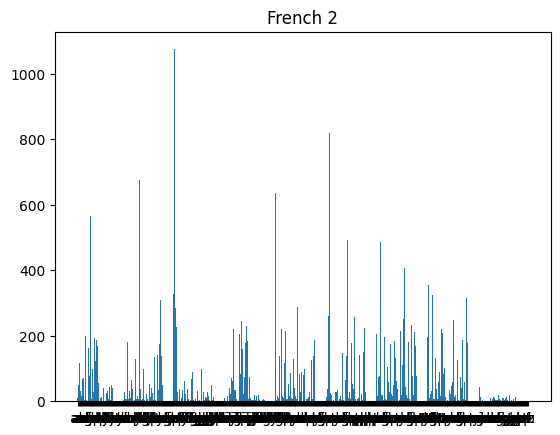

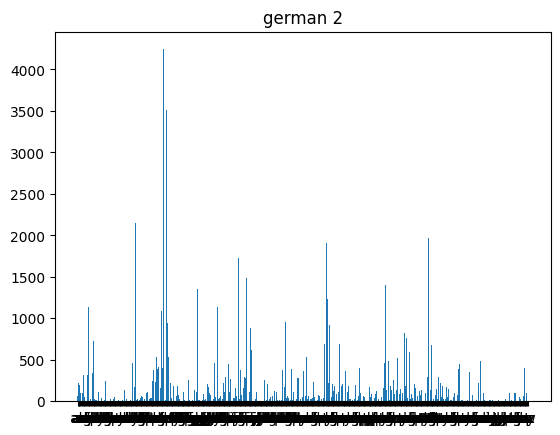

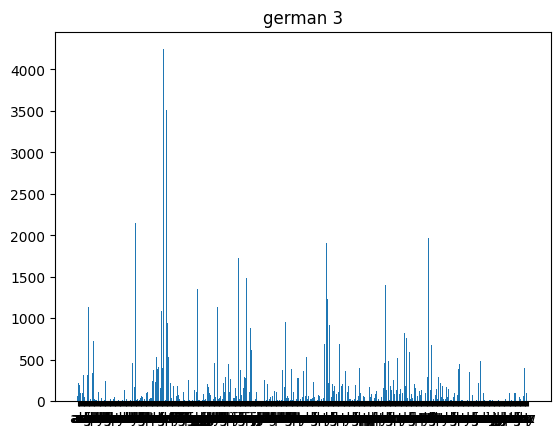

In [14]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

bigram_de2 = Counter(ngrams(de2,2))
plothistogram(bigram_de2)
plt.title('german 2')
plt.show()

bigram_de3 = Counter(ngrams(de3,2))
plothistogram(bigram_de2)
plt.title('german 3')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [15]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

In [30]:
chr(ord('a')+1)

'b'

the above function plotbihistogram creates a 26*26 matrix of ngrams of letters

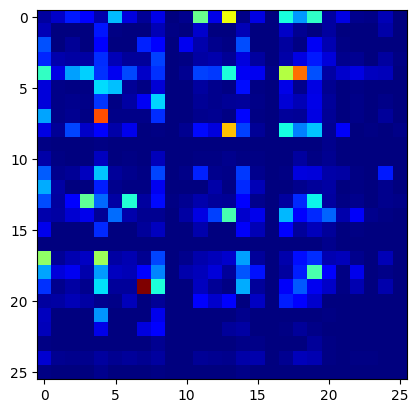

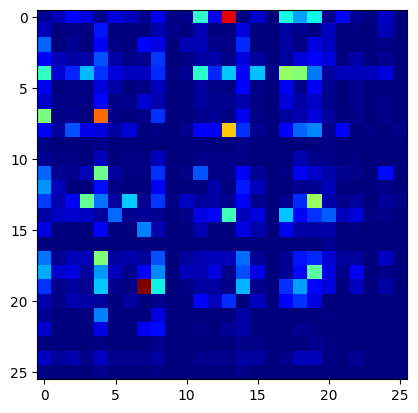

In [16]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

In [17]:
bieng1

array([[ 24.,  55., 128.,  99.,  35., 261.,  72.,  17.,  78.,   2.,  10.,
        404.,  76., 538.,   7.,  73.,   1., 321., 231., 345.,  24.,  75.,
         13.,   7.,  42.,   1.],
       [ 40.,   1.,   3.,   1., 123.,   4.,   0.,   0.,  41.,   4.,   0.,
         59.,   1.,   0.,  42.,   2.,   0.,  53.,  16.,   1.,  25.,   0.,
          0.,   0.,  30.,   0.],
       [173.,   0.,  19.,   0., 108.,   0.,   1., 134., 103.,   0.,  84.,
         35.,  10.,   4., 171.,   1.,   1.,  25.,   6.,  87.,  39.,   4.,
          2.,   0.,   2.,   0.],
       [137.,  34.,  27.,  28., 143.,  40.,  22.,  20., 159.,   0.,   6.,
         28.,  36.,  17.,  71.,  24.,   0.,  32.,  74., 125.,  67.,  10.,
         15.,   0.,  25.,   5.],
       [348.,  75., 240., 278., 146.,  83., 166.,  54., 146.,   1.,  14.,
        159., 153., 324.,  88.,  85.,   8., 478., 665., 172.,  29.,  58.,
         74.,  47.,  46.,   3.],
       [ 66.,   9.,   4.,   6., 289., 264.,  19.,   5.,  65.,   0.,   1.,
         25.,  12.,  

# French 2d map

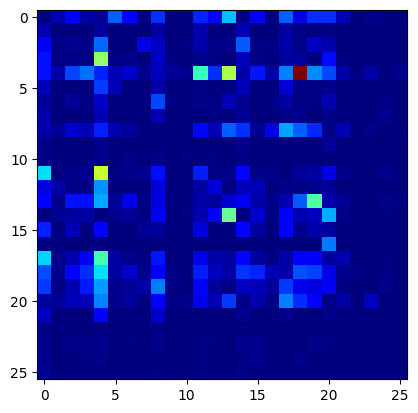

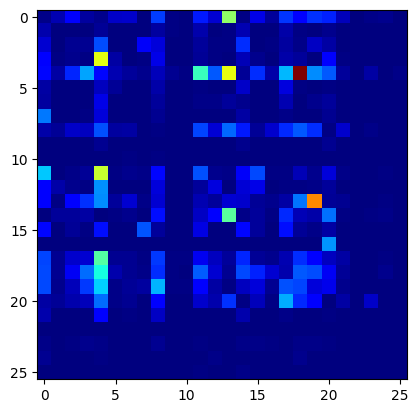

In [18]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

# German 2D map

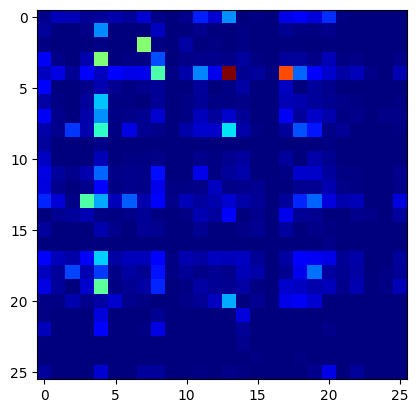

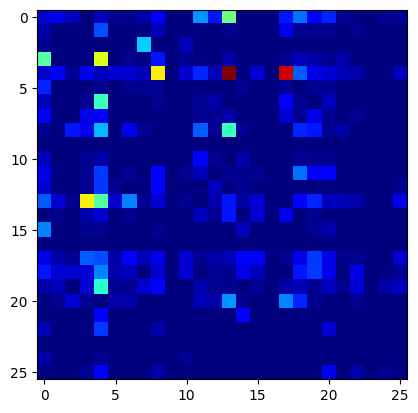

In [19]:
bide2=plotbihistogram(bigram_de2)
plt.show()
bide3=plotbihistogram(bigram_de3)

Let us look at the top 10 ngrams for each text.

In [20]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [21]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)
print('\nGeramn 2:')
ShowTopN(bide2)
print('\nGerman 3:')
ShowTopN(bide3)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0

Geramn 2:
('e', 'n') : 4243.0
('e', 'r') : 3515.0
('c', 'h') : 2172.0
('d', 'e') : 2147.0
('t', 'e') : 1965.0
('n', 'd') : 1902.0
('e', 'i') : 1876.0
('i', 'e') : 1727.0
('i', 'n') : 1489.0


TRIGRAMS

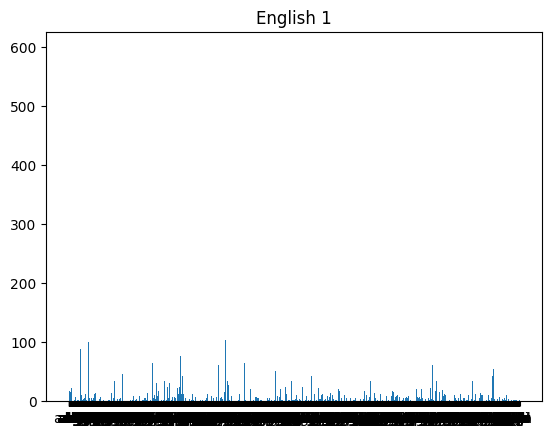

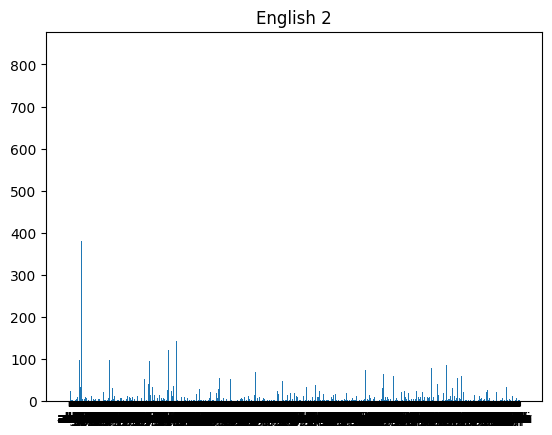

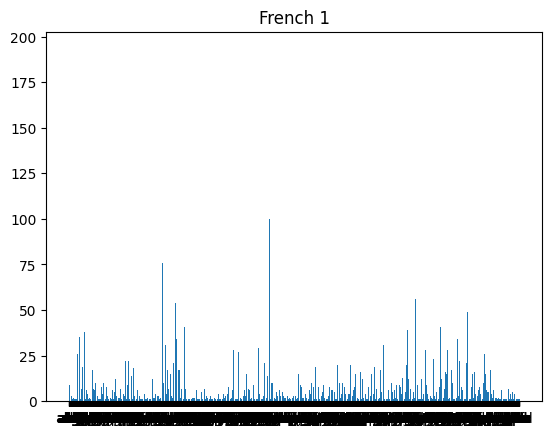

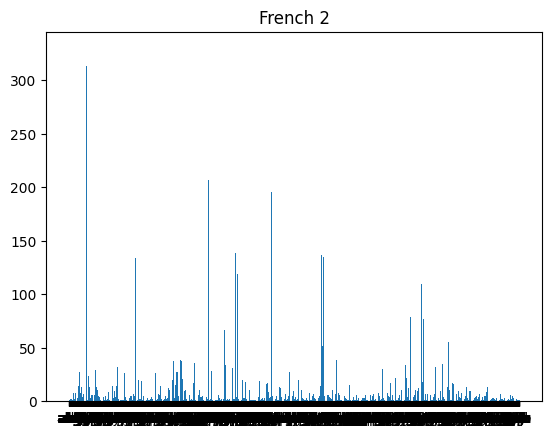

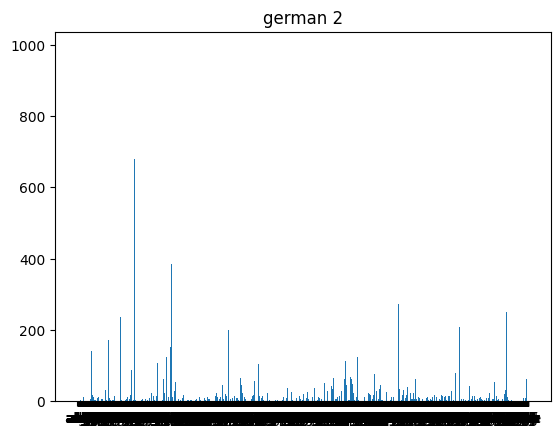

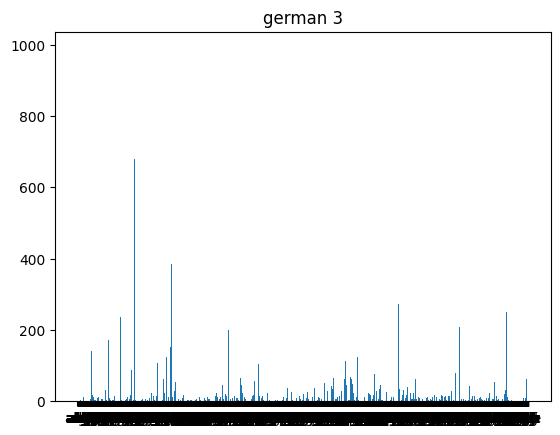

In [22]:
trigram_eng1 = Counter(ngrams(eng1,3)) # bigrams
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()

trigram_eng2 = Counter(ngrams(eng2,3))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()

trigram_fr1 = Counter(ngrams(fr1,3))
plothistogram(trigram_fr1)
plt.title('French 1')
plt.show()

trigram_fr2 = Counter(ngrams(fr2,3))
plothistogram(trigram_fr2)
plt.title('French 2')
plt.show()

trigram_de2 = Counter(ngrams(de2,3))
plothistogram(trigram_de2)
plt.title('german 2')
plt.show()

trigram_de3 = Counter(ngrams(de3,3))
plothistogram(trigram_de2)
plt.title('german 3')
plt.show()

# Plotting Trigram with Pie Chary

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def plottrigrampiechart(ngram):
  plt.pie(ngram.values(), labels=ngram.keys(), autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.show()

In [40]:
trigram_eng1.values()

dict_values([596, 62, 86, 227, 233, 229, 225, 208, 12, 20, 20, 14, 24, 45, 22, 27, 13, 6, 16, 15, 21, 54, 45, 5, 5, 4, 3, 9, 1, 9, 9, 4, 4, 8, 121, 4, 3, 9, 31, 37, 51, 44, 16, 205, 75, 8, 37, 91, 12, 32, 7, 5, 4, 27, 22, 7, 6, 37, 17, 41, 105, 15, 8, 22, 70, 17, 80, 125, 8, 6, 17, 28, 22, 1, 69, 11, 15, 70, 30, 15, 9, 20, 35, 35, 25, 39, 274, 53, 80, 28, 26, 32, 10, 11, 9, 43, 53, 39, 45, 33, 10, 38, 18, 71, 33, 45, 18, 1, 25, 16, 19, 15, 119, 137, 32, 36, 31, 10, 8, 118, 34, 19, 33, 82, 21, 77, 41, 23, 28, 28, 51, 3, 9, 11, 13, 2, 9, 40, 31, 61, 51, 46, 57, 65, 14, 6, 9, 12, 30, 16, 15, 13, 41, 20, 13, 18, 31, 24, 5, 29, 55, 64, 2, 2, 31, 37, 24, 21, 13, 11, 18, 21, 20, 28, 25, 30, 11, 19, 90, 17, 15, 8, 11, 51, 23, 9, 13, 20, 103, 52, 9, 22, 53, 17, 12, 21, 30, 43, 5, 11, 8, 14, 3, 55, 61, 45, 10, 94, 3, 19, 15, 9, 12, 3, 19, 56, 5, 5, 18, 2, 43, 36, 15, 16, 5, 3, 1, 21, 5, 1, 2, 22, 25, 51, 35, 3, 9, 11, 9, 18, 5, 14, 3, 12, 13, 9, 8, 2, 2, 1, 4, 22, 1, 2, 3, 2, 4, 2, 15, 12, 11, 1

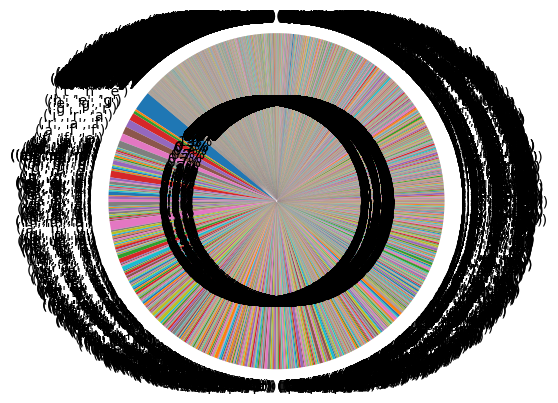

In [44]:
plottrigrampiechart(trigram_eng1)

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [47]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [48]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [49]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [50]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]

Let us visualize a few images here:

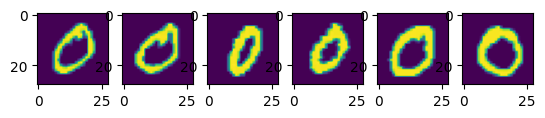

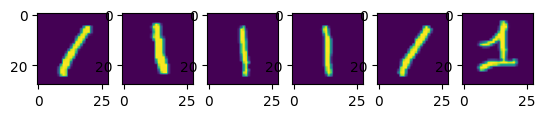

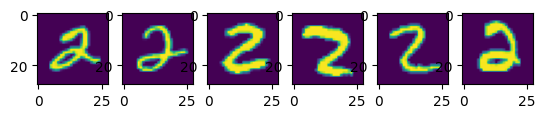

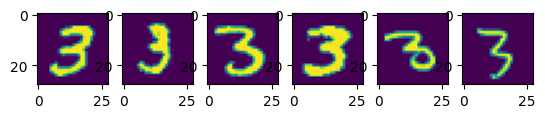

In [51]:
def plot_images(imageList,ranges=5):
  for ii in range(ranges):
    plt.subplot(1, ranges, ii+1)
    plt.imshow(imageList[ii,:,:])
  plt.show()

plot_images(no0,6)
plot_images(no1,6)
plot_images(no2,6)
plot_images(no3,6)

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [66]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))

In [53]:
print(sum1)

[96 93 68 ... 76 96 74]


In [67]:
print(sum2)

[188 150 226 ... 167 198 149]


Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

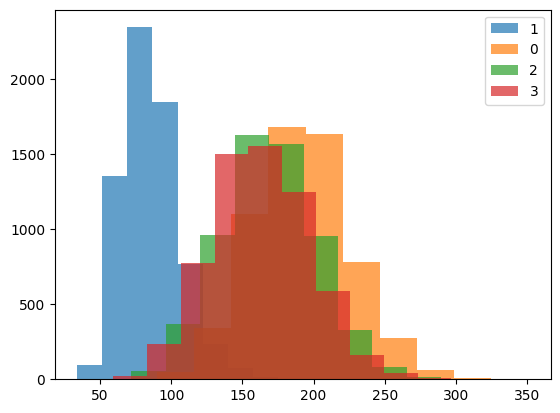

In [71]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);
plt.hist(sum3, alpha=0.7);
plt.legend(['1','0','2','3'])

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [55]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

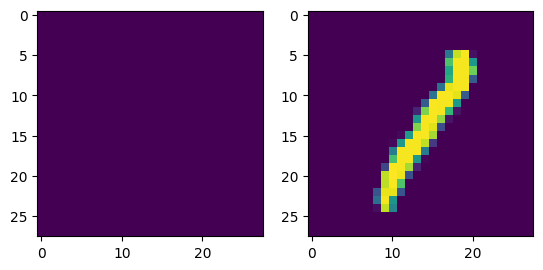

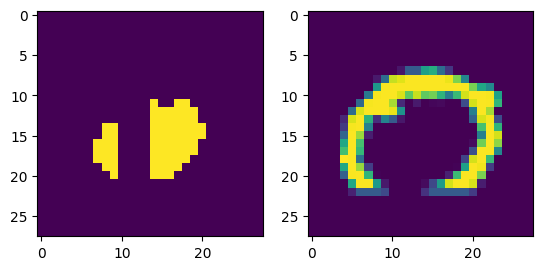

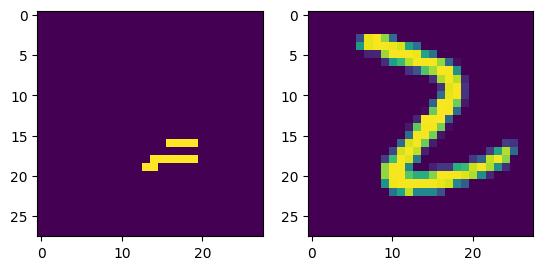

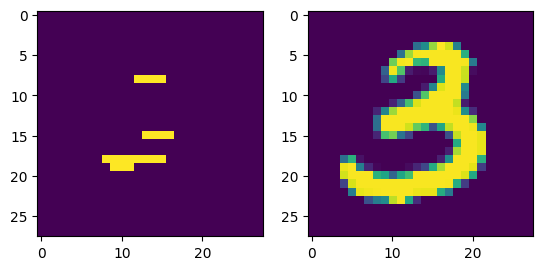

In [75]:
imgs = [no1[456,:,:],  no0[456,:,:],no2[456,:,:],no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

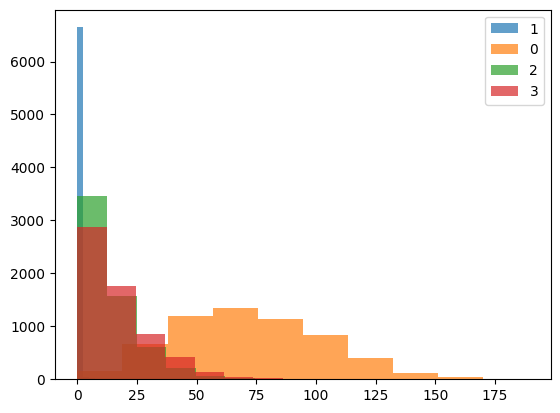

In [76]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);
plt.legend(['1','0','2','3'])

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [58]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

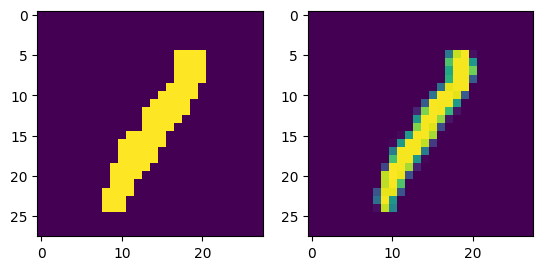

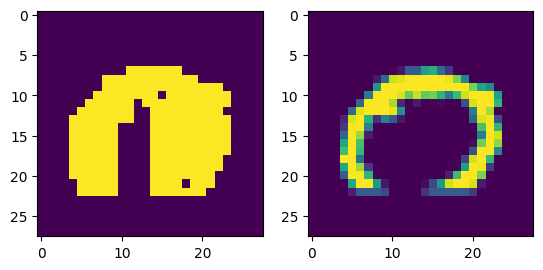

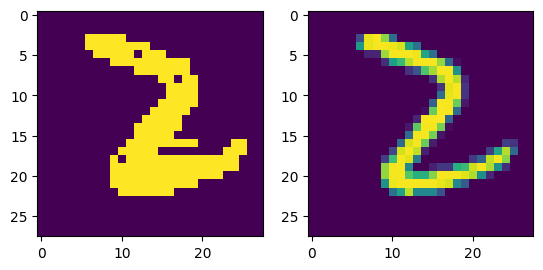

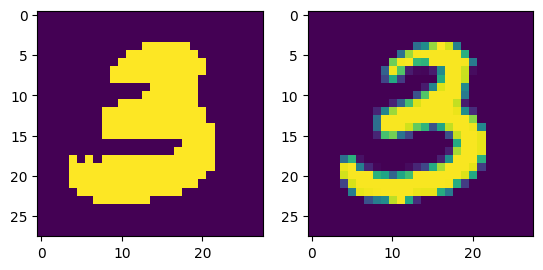

In [77]:
imgs = [no1[456,:,:],  no0[456,:,:],no2[456,:,:],no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

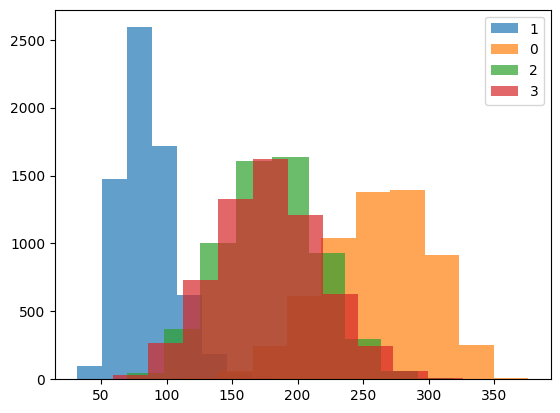

In [78]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha=0.7);
plt.hist(hull3, alpha=0.7);
plt.legend(['1','0','2','3'])

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [61]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

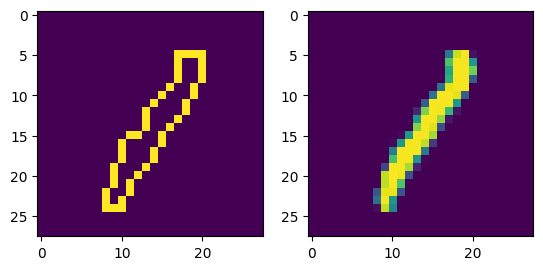

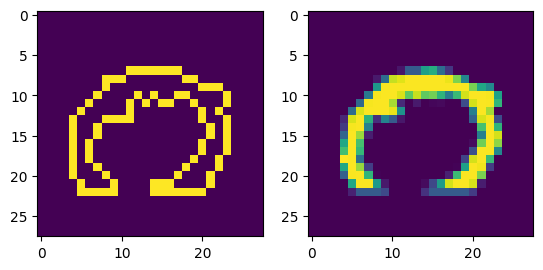

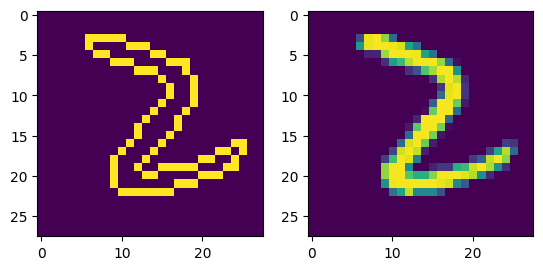

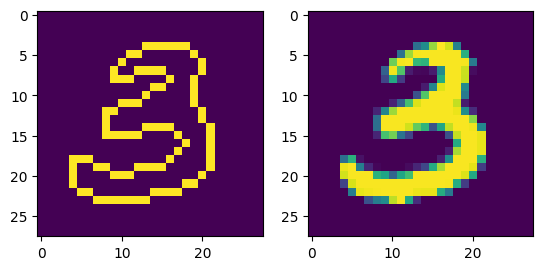

In [79]:
imgs = [no1[456,:,:],  no0[456,:,:],no2[456,:,:],no3[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

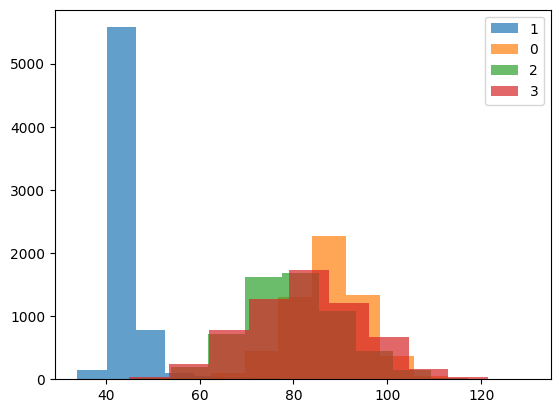

In [82]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound2= np.array([getBoundaryPixels(i).sum() for i in no2])
bound3= np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);
plt.legend(['1','0','2','3'])

What will happen if we plot two features together?

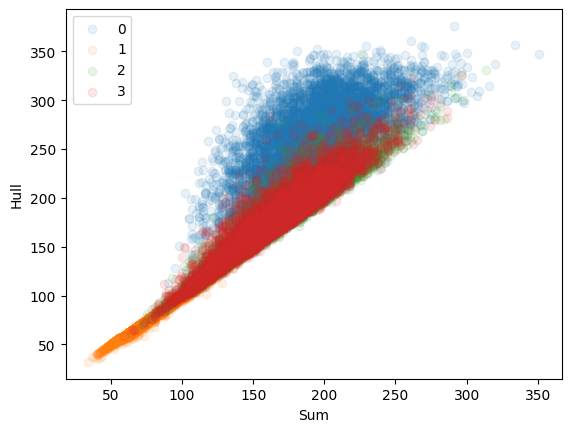

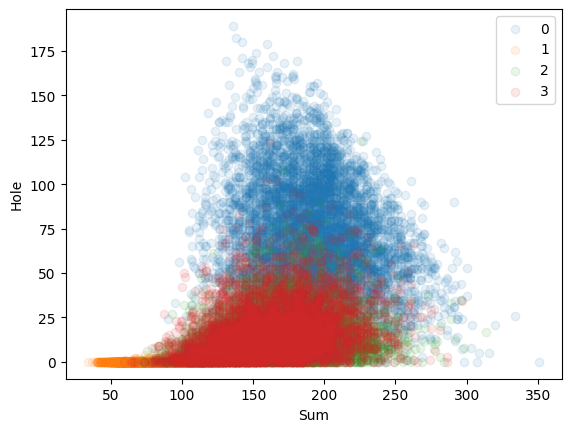

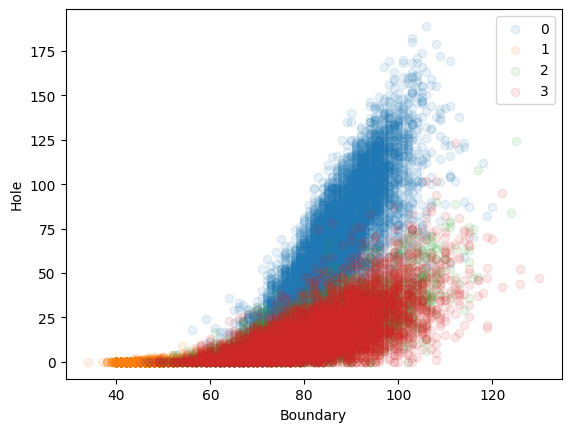

In [83]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.scatter(sum2, hull2, alpha=0.1)
plt.scatter(sum3, hull3, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1','2','3'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.scatter(sum2, hole2, alpha=0.1)
plt.scatter(sum3, hole3, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1','2','3'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.scatter(bound3, hole3, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1','2','3'])
plt.show()

Now let us try plotting 3 features together.

In [86]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
cl2 = ['class 2']*len(sum2)
cl3 = ['class 3']*len(sum3)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0,hole2,hole3)), np.concatenate((sum1,sum0,sum2,sum3)),
                           np.concatenate((bound1,bound0,bound2,bound3)), np.concatenate((cl1, cl0,cl2,cl3)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

In [87]:
df.head()

,Hole,Sum,Boundary,Class
0,0,96,46,class 1
1,0,93,45,class 1
2,0,68,42,class 1
3,0,75,43,class 1
4,0,95,42,class 1


Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?